## NetCDF basics in Python

1. Read data from a NetCDF file
2. Create a simple contour plot

In [1]:
# core scientific libraries
import os
import sys
import numpy as np
import pandas as pd
import xarray as xr

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# secondary libraries
import netCDF4 as nc

### Reading data from a NetCDF file

For this example, we will read monthly 2-meter temperature data from a netCDF file of ERA-Interim reanalysis (0.75 deg, 2000-2005).

In [2]:
# Set filepath
datdir = '../sample-data/'
filename = 'erai.mon.t2m.2000-2005.nc'
filepath = datdir + filename
print(filepath, '\n')

# Open NetCDF Dataset object
f = nc.Dataset(filepath,'r')

# List variable names
print("Variables:")
print(f.variables.keys(),'\n')

# Show dimension names and sizes
print("Dimensions:")
print(f.dimensions.items(),'\n')

# Print all file metadata
#print(f)   # or run 'ncdump -h <filename>' in terminal

../sample-data/erai.mon.t2m.2000-2005.nc 

Variables:
dict_keys(['longitude', 'latitude', 'time', 't2m']) 

Dimensions:
dict_items([('longitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 480), ('latitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 241), ('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 72)]) 



In [3]:
# Read the variables
lons = f.variables['longitude'][:] # [:] syntax stores data in np arrays
lats = f.variables['latitude'][:]
t2m  = f.variables['t2m'][:]
time = f.variables['time']

# Inspect your data
print(lats.shape, lons.shape) # print array sizes
print(t2m.shape)  
print(lats[0:10])  # print some values

# Retrieve attributes
t2m_units    = f.variables['t2m'].units
t2m_longname = f.variables['t2m'].long_name
t2m_missing  = f.variables['t2m'].missing_value
print(t2m_longname)

(241,) (480,)
(72, 241, 480)
[90.   89.25 88.5  87.75 87.   86.25 85.5  84.75 84.   83.25]
2 metre temperature


### Time coordinate handling

**`num2date(`**`times, units, calendar='standard')`: <br>
converts numeric time values to datetime objects, given the specified `units` and `calendar`. Units are generally written in the format `"hours since YY:MM:DD hh-mm-ss"` or "\{time unit\} since \{some reference time\}"

**`date2num(`**`dates, units, calendar='standard')`: <br>
converts datetime objects to numeric values of time (the reverse of num2date)


Two options for making a datetime array:  

1) Method 1: Read in times from netcdf file and convert it to a datetime object (you will also need to read in the time.units attribute).


In [4]:
# convert times to a datetime object
time_units = f.variables['time'].units
dates = nc.num2date(time[:], time_units)

2) Method 2: Create a pandas datetime object from scratch (this is what I usually do)

In [ ]:
dates_pd = pd.date_range(start='2000-01-01', end='2005-12-01', 
                         freq='M')  ## check to see if this works...
print(dates_pd)

### Simple arithmetic operations

In [ ]:
# convert temperature to C

t2m_degC = t2m + 273.15
print(t2m_degC)

In [5]:
# Average over the time dimension

t2m_mean = np.mean(t2m, axis=0)
print(t2m_mean.shape)


(241, 480)


## Plotting

Create a filled contour plot of 500-hpa geopotential heights using cartopy and matplotlib.

When plotting with cartopy, you must specify the source coordinates of your data (`datacrs` = _data coordinates_) and the coordinate or projection that you want to plot your data in (`mapcrs` = _map coordinates_). Always use "PlateCarree" if your data are in lat/lon coordinates. See link below for all available projections.

Plotting resources:
* [Cartopy projection list](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#cartopy-projections)
* [Matplotlib colormaps](https://matplotlib.org/tutorials/colors/colormaps.html)

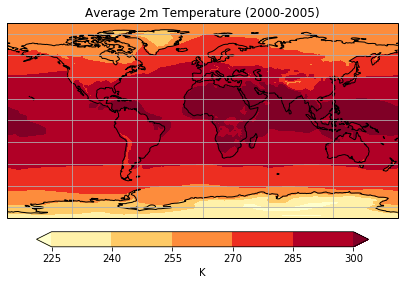

In [6]:
# Data for plotting
data = t2m_mean

# Set map projection
mapcrs = ccrs.PlateCarree() # mapcrs - what want in
datacrs = ccrs.PlateCarree() # datacrs - what comes in

# Set up figure and axes
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1, 1, 1, projection=mapcrs)

# Set up extent of the map [x0, x1, y0, y1]
ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=mapcrs)

# Add data
p = ax.contourf(lons, lats, data, transform=datacrs,
                cmap='YlOrRd', extend='both')

# Add plot elements
ax.coastlines()
ax.gridlines()
plt.title('Average 2m Temperature (2000-2005)')

# Add colorbar
cbar = plt.colorbar(p, orientation='horizontal',
                    shrink=0.85, pad=0.05, 
                    label=t2m_units)

# Save to file
plt.savefig('plotfile.png')

# Show plot
plt.show()

## Challenge Time!

1. Change the colormap of the plot. 

[Hint](https://matplotlib.org/tutorials/colors/colormaps.html)

2. Change the extent of the plot. 

[Hint](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_extent)